# Imports

In [2]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Leitura da planilha e "limpeza"

In [3]:
df = pd.read_excel('dados.xlsx')
df.head(10)

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari
5,6,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Branca,...,NR/NS,Calçada,Sim,Não,Não,-23.550055,-46.631792,2021-11-04,Sé,Sé
6,7,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,43,31 a 49,Adulto,Branca,...,Mais de 2 anos até 5 anos,Baixos de Viaduto,Sim,Não,Não,-23.509792,-46.624871,2021-10-21,Santana-Tucuruvi,Santana
7,8,Rua,Não se aplica,Não se aplica,Masculino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Calçada,Sim,Sim,Sim,-23.533531,-46.643104,2021-11-03,Sé,Santa Cecília
8,9,Acolhido,Neste centro de acolhida (aqui),Mais de 6 meses,Feminino,Mulher Cisgênero,44,31 a 49,Adulto,Branca,...,Mais de 5 anos até 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.534555,-46.600631,2021-11-08,Mooca,Belém
9,10,Rua,Não se aplica,Não se aplica,Masculino,Não respondeu,50,50 a 59,Adulto,Branca,...,Mais de 6 meses até 1 ano,Calçada,Sim,Não,Não,-23.552632,-46.611866,2021-11-08,Mooca,Brás


In [4]:
df.columns

Index(['ID', 'Situação de rua', 'Onde dormiu ontem', 'Tempo de permanência',
       'Sexo', 'Identifica com o sexo nasceu', 'Idade', 'Faixa de idade',
       'Classificação de idade', 'Cor_Raça_Etnia', 'Parentes no CA',
       'Tempo na situação', 'Tipo de ponto', 'Presença_Moradia_Improvisada',
       'Criança_acomp_Adulto', 'Criança_Sozinha', 'Latitude', 'Longitude',
       'Data', 'Subprefeitura', 'Distrito'],
      dtype='object')

In [5]:
df.Subprefeitura = df.Subprefeitura.replace("M'boi Mirim", "M'Boi Mirim")

# Analise Exploratória sobre Subprefeituras

In [6]:
print(pd.Series(df.Subprefeitura.value_counts()))

Subprefeitura
Sé                           12851
Mooca                         5811
Vila Maria-Vila Guilherme     1238
Santana-Tucuruvi              1232
Santo Amaro                   1090
Lapa                          1062
Vila Mariana                   972
Penha                          583
Itaquera                       549
Pinheiros                      545
Ipiranga                       544
Casa Verde-Cachoeirinha        539
São Miguel                     417
Aricanduva-Formosa-Carrão      407
Guaianases                     391
Campo Limpo                    348
Ermelino Matarazzo             346
Jabaquara                      345
Capela do Socorro              340
Vila Prudente                  303
Jaçanã-Tremembé                297
São Mateus                     288
Butantã                        263
Cidade Ademar                  193
Itaim Paulista                 186
Freguesia-Brasilândia          165
M'Boi Mirim                    143
Cidade Tiradentes              134
Perus 

In [7]:
sub_x_situacao = pd.crosstab(df['Situação de rua'],df.Subprefeitura, normalize='columns')


In [8]:
acolhidos = []
rua = []

for i in sub_x_situacao:
    acolhidos.append(round(sub_x_situacao[i][0],2)*100)
    rua.append(round(sub_x_situacao[i][1],2)*100)


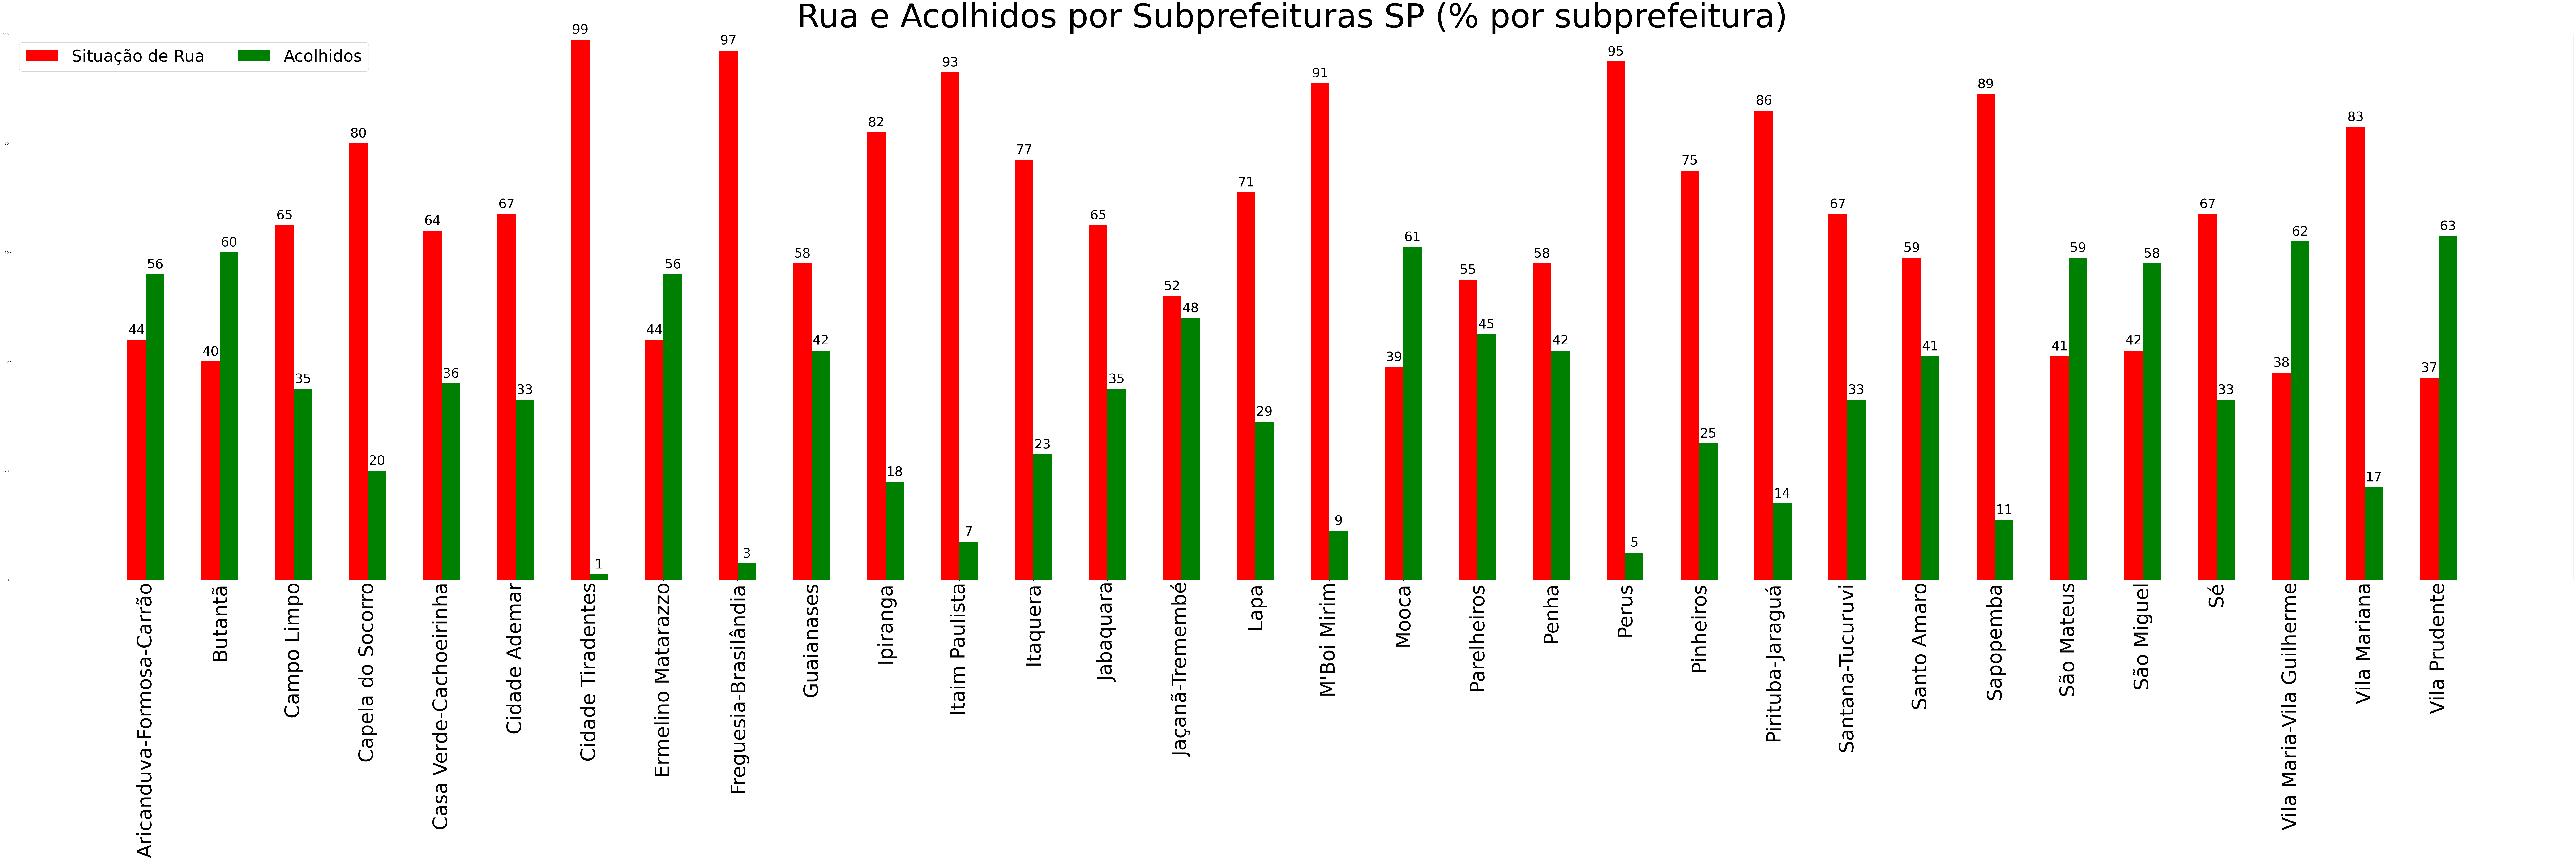

In [9]:
subprefeituras = list(sub_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(140,30))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="40")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Subprefeituras SP (% por subprefeitura)', fontsize="100")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="60", rotation=90)
ax.legend(loc='upper left', ncols=2, fontsize="50")
ax.set_ylim(0, 100)

plt.show()

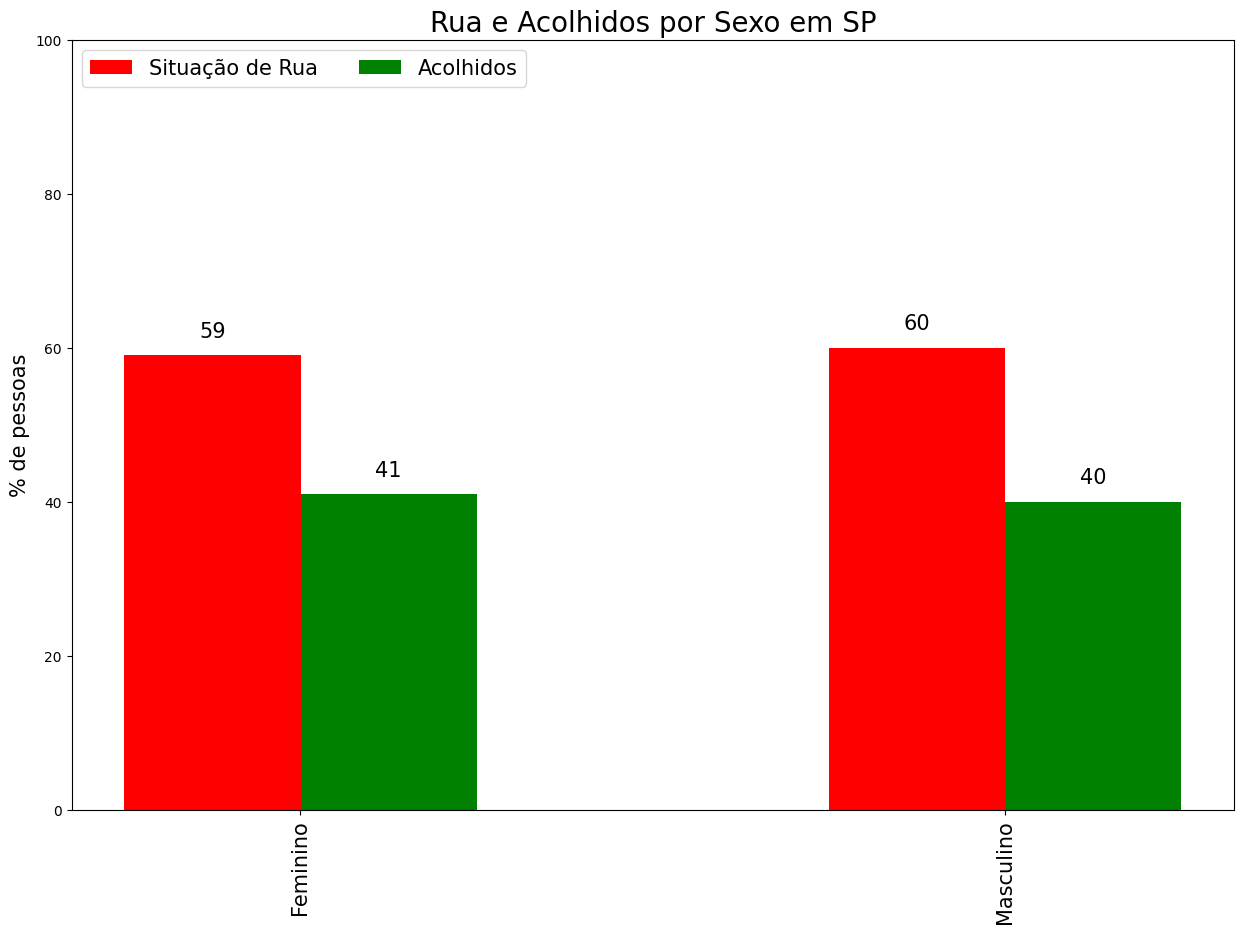

In [38]:
df_sexo = df.loc[(df.Sexo != 'Sem identificação')]
sexo_x_situacao = dict(pd.crosstab(df_sexo['Situação de rua'],df_sexo.Sexo, normalize='columns'))


acolhidos = []
rua = []

for i in sexo_x_situacao:
    acolhidos.append(round(sexo_x_situacao[i][0],2)*100)
    rua.append(round(sexo_x_situacao[i][1],2)*100)


subprefeituras = list(sexo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,10))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Sexo em SP', fontsize="20")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', ncols=2, fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

---
## Socioeconomicas
---

In [11]:
df_socio = pd.read_excel('socio.xlsx')
df_socio

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,335503001,Aricanduva / Vila Formosa,355030,São Paulo,RM São Paulo (SP),63500,2000,74.49,1.63,15.4,...,97.43,67.27,95.42,93.70,0.578,0.718,0.762,0.668,0.825,0.804
1,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2000,75.53,1.68,13.8,...,96.18,60.39,93.51,87.79,0.635,0.680,0.789,0.665,0.842,0.876
2,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2000,74.37,2.01,15.6,...,94.18,48.53,90.86,87.20,0.481,0.582,0.699,0.546,0.823,0.760
3,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2000,70.97,2.21,21.6,...,93.15,47.55,90.05,83.96,0.468,0.550,0.656,0.521,0.766,0.707
4,335503005,Casa Verde,355030,São Paulo,RM São Paulo (SP),63500,2000,74.59,1.85,15.2,...,95.33,58.11,92.79,89.05,0.550,0.652,0.732,0.616,0.827,0.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,335503027,São Miguel Paulista,355030,São Paulo,RM São Paulo (SP),63500,2010,74.30,1.70,15.8,...,96.65,64.99,93.92,91.26,0.591,0.741,0.736,0.687,0.822,0.705
58,335503028,Sé,355030,São Paulo,RM São Paulo (SP),63500,2010,80.33,1.23,7.8,...,95.24,71.34,92.12,89.91,0.818,0.799,0.889,0.805,0.922,0.947
59,335503029,Vila Maria / Vila Guilherme,355030,São Paulo,RM São Paulo (SP),63500,2010,77.88,1.43,10.7,...,95.63,63.53,92.29,90.24,0.659,0.749,0.793,0.718,0.881,0.787
60,335503030,Vila Mariana,355030,São Paulo,RM São Paulo (SP),63500,2010,81.35,1.16,6.7,...,97.55,78.91,96.34,94.10,0.899,0.868,0.938,0.878,0.939,1.000


In [12]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]
list(df_socio_2010.NOME_REG)

['Aricanduva / Vila Formosa',
 'Butantã',
 'Campo Limpo',
 'Capela do Socorro',
 'Casa Verde',
 'Cidade Ademar',
 'Cidade Tiradentes',
 'Ermelino Matarazzo',
 'Freguesia do Ó / Brasilândia',
 'Guaianases',
 'Ipiranga',
 'Itaim Paulista',
 'Itaquera',
 'Jabaquara',
 'Jaçanã / Tremembé',
 'Lapa',
 "M'Boi Mirim",
 'Mooca',
 'Parelheiros',
 'Penha',
 'Perus',
 'Pinheiros',
 'Pirituba / Jaraguá',
 'Santana / Tucuruvi',
 'Santo Amaro',
 'São Mateus',
 'São Miguel Paulista',
 'Sé',
 'Vila Maria / Vila Guilherme',
 'Vila Mariana',
 'Vila Prudente']

In [40]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

In [42]:
df_socio_2010.head(5)

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
31,335503001,Aricanduva-Formosa-Carrão,355030,São Paulo,RM São Paulo (SP),63500,2010,78.20,1.37,10.3,...,96.47,71.40,94.13,89.17,0.704,0.781,0.822,0.754,0.887,0.831
32,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2010,79.70,1.35,8.5,...,96.49,63.04,92.71,88.91,0.731,0.753,0.859,0.746,0.912,0.932
33,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2010,78.00,1.55,10.5,...,96.29,58.66,92.80,90.72,0.603,0.707,0.783,0.670,0.883,0.810
34,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2010,75.22,1.71,14.4,...,96.51,62.30,93.86,92.12,0.592,0.724,0.750,0.677,0.837,0.745
35,335503005,Casa Verde-Cachoeirinha,355030,São Paulo,RM São Paulo (SP),63500,2010,77.95,1.44,10.6,...,95.58,64.89,92.39,90.33,0.678,0.757,0.799,0.730,0.883,0.792


### Colunas a ser trabalhads: DENSIDADE, IDHM, IDHM_E, IDHM_L, IDHM_R
